In [1]:
import pickle

with open('./remote_loss/mobilenet_content_loss.pkl', 'rb') as f:
    l_c = pickle.load(f)
with open('./remote_loss/mobilenet_style_loss.pkl', 'rb') as f:
    l_s = pickle.load(f)

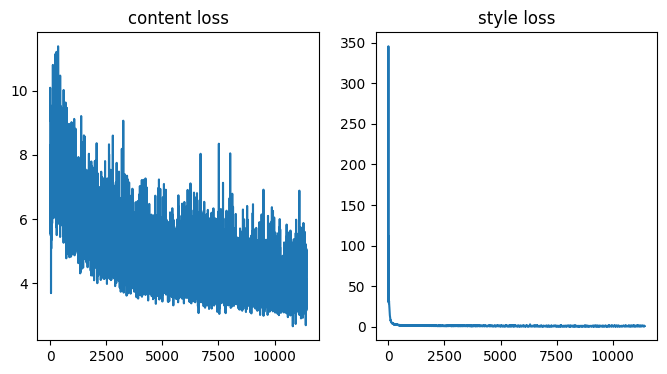

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(121, title='content loss')
plt.plot(l_c)
plt.subplot(122, title='style loss')
plt.plot(l_s)
plt.savefig('./pic/mobilenet_mosaic_loss.pdf')

In [3]:
from utils import *
from networks import *


device = 'cuda:0'

img_net = TransformerMobileNet().to(device)

e:\python\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
img_net.load_state_dict(torch.load('./weight/mobilenet.pt'))

<All keys matched successfully>

In [5]:
from torch.autograd import Variable

IMAGE_SIZE = 256
dataset_transform = transforms.Compose([
        transforms.Resize(IMAGE_SIZE),          # scale shortest side to image_size
        transforms.CenterCrop(IMAGE_SIZE),      # crop center image_size out
        transforms.ToTensor(),                  # turn image from [0-255] to [0-1]
        imagenet_normalize()                    # normalize with ImageNet values
    ])

style_img = load_image('./style_imgs/mosaic.jpg')
style_tensor = Variable(dataset_transform(style_img).repeat(1, 1, 1, 1), requires_grad=False)

def transfer(in_path):
    test_img = load_image(in_path)
    test_tensor = Variable(dataset_transform(test_img).repeat(1, 1, 1, 1), requires_grad=False).to(device)
    out_tensor = img_net(test_tensor).detach().cpu()[0]
    return out_tensor

In [6]:
a = transfer('./content_imgs/flower.jpg')
save_image('./pic/mobilenet_mosaic_flower.jpg', a)